In [1]:
# Step 1: Importing Libraries:

import pandas as pd
from pycaret.classification import * 

In [2]:
# Step 2: Load DataSet:
# using 'indian_liver_patient.csv' from Mendeley Data

try:
    df = pd.read_csv('indian_liver_patient.csv')
    print("Dataset loaded successfully")
    print(f"Original shape of the data: {df.shape}")
    print("\nFirst 5 rows of the data:")
    print(df.head())
except FileNotFoundError:
    print("Error: DataSet not found")
    exit()

Dataset loaded successfully
Original shape of the data: (583, 11)

First 5 rows of the data:
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Al

In [3]:
# Step 3: Data Preprocessing:

# PyCaret setup() function can handle most,
# but a few explicit steps can be done mannually to check

# 1) Handle Missing Values

    
# checking null values in columns
df.isna().sum()

    

# The 'Albumin_and_Globulin_Ratio' column has missing values 
# filling them with the mean
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())
print(f"\nMissing values after imputation: {df.isnull().sum().sum()}")

# 2. Encode Categorical Features
# Converting 'Gender' from string to numbers, i.e, 'Male'-> 1 and 'Female' -> 0

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


# 3. Map Target Variable
# The target column 'Dataset' uses 1 (disease) and 2 (no disease)
# for binary classification, it's standard to use 1 and 0
# so 1 -> 1 (disease) and 2 -> 0 (no disease)

df['Dataset'] = df['Dataset'].map({1: 1, 2: 0})

print("\nData after preprocessing:")
print(df.head())




Missing values after imputation: 0

Data after preprocessing:
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ra

In [4]:
# Step 4: PyCaret Setup :

# to prepare the data for modeling
# session_id is like random_state for reproducibility
# target is the name of our outcome variable
clf_setup = setup(data=df, target='Dataset', session_id=123,fix_imbalance=True
                   )




,Description,Value
0,Session id,123
1,Target,Dataset
2,Target type,Binary
3,Original data shape,"(583, 11)"
4,Transformed data shape,"(757, 11)"
5,Transformed train set shape,"(582, 11)"
6,Transformed test set shape,"(175, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [5]:
# Step 5: Compare models :

# function trains all models in the PyCaret model library
# and compares them using cross-validation

print("\nComparing all models:")
best_model = compare_models()

print("Best model found:")
print(best_model)



Comparing all models:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6987,0.7425,0.7906,0.7892,0.7854,0.2633,0.2698,0.1700
rf,Random Forest Classifier,0.6765,0.7324,0.7631,0.7824,0.7680,0.2196,0.2259,0.2050
gbc,Gradient Boosting Classifier,0.6665,0.6909,0.7354,0.7886,0.7554,0.2155,0.2240,0.1490
dt,Decision Tree Classifier,0.6516,0.5959,0.7251,0.7722,0.7453,0.1857,0.1882,0.0320
lightgbm,Light Gradient Boosting Machine,0.6471,0.6937,0.7455,0.7579,0.7477,0.1445,0.1479,0.6770
knn,K Neighbors Classifier,0.6373,0.6882,0.6290,0.8210,0.7092,0.2471,0.2639,0.5650
lr,Logistic Regression,0.6296,0.7330,0.5739,0.8608,0.6857,0.2767,0.3114,0.5420
svm,SVM - Linear Kernel,0.6251,0.6674,0.6154,0.8466,0.6735,0.2247,0.2659,0.0260
ada,Ada Boost Classifier,0.6178,0.6518,0.6633,0.7658,0.7089,0.1579,0.1598,0.0990
ridge,Ridge Classifier,0.6103,0.7136,0.5259,0.8833,0.6558,0.2665,0.3193,0.0360


Best model found:
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [6]:
# Step 6: Tune the Best Model

print("Tuning the best model found by compare_models()...")
print("This was the best model:")
print(best_model)

# Tune the model's hyperparameters
tuned_model = tune_model(best_model)

print("\nTuned model details:")
print(tuned_model)

Tuning the best model found by compare_models()...
This was the best model:
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5854,0.7061,0.5333,0.8421,0.6531,0.1979,0.2316
1,0.7073,0.7787,0.6207,0.9474,0.7500,0.4319,0.4903
2,0.7073,0.7328,0.6552,0.9048,0.7600,0.4087,0.4447
3,0.5366,0.5805,0.4138,0.8571,0.5581,0.1809,0.2371
4,0.6829,0.7241,0.7241,0.8077,0.7636,0.2865,0.2904
5,0.5610,0.7155,0.4483,0.8667,0.5909,0.2099,0.2660
6,0.6341,0.6782,0.5517,0.8889,0.6809,0.3035,0.3530
7,0.6585,0.7672,0.6207,0.8571,0.7200,0.3101,0.3374
8,0.5750,0.7022,0.5517,0.8000,0.6531,0.1500,0.1680


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

Tuned model details:
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


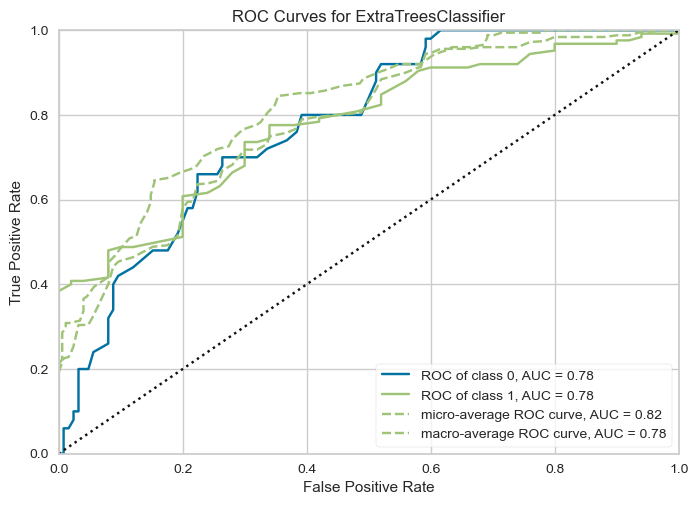

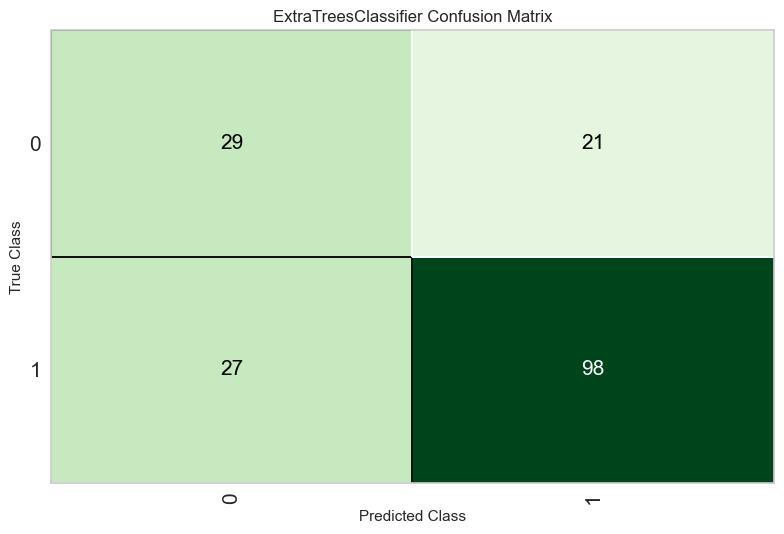

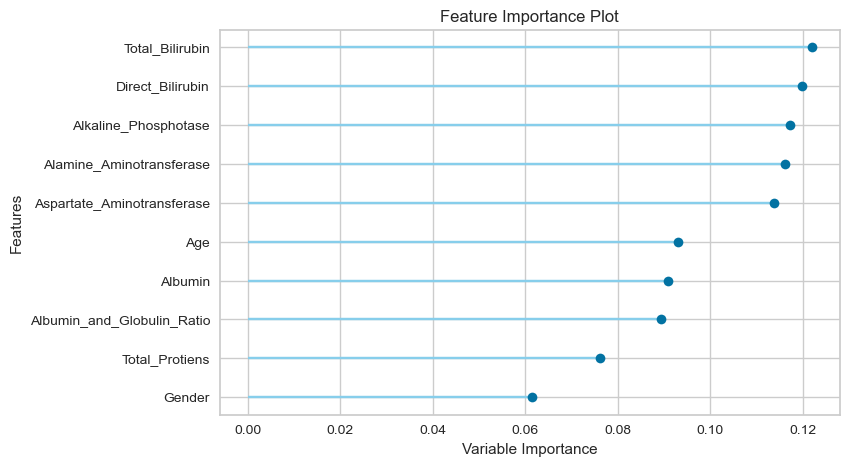


Evaluating model on the hold-out test set:


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [7]:
# Step 7: Plot and evaluate model:

# generating several plots to evaluate performance

# 1. AUC Plot
plot_model(tuned_model, plot='auc')

# 2. Confusion Matrix
plot_model(tuned_model, plot='confusion_matrix')

# 3. Feature Importance
try:
    plot_model(tuned_model, plot='feature')
except:
    print("Feature importance plot not be available for this model type")

# Evaluate the model on the hold-out test set
print("\nEvaluating model on the hold-out test set:")
evaluate_model(tuned_model)

In [8]:
# Step 8: Finalize and save model :

#  training model on complete dataset including the hold-out set
print("\nmodel training on complete data:")
final_model = finalize_model(tuned_model)

print("Final model details:")
print(final_model)

# Save the entire pipeline like imputers, encoders, model to a file
save_model(final_model, 'liver_disease')


model training on complete data:
Final model details:
Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Gender', 'Total_Bilirubin',
                                             'Direct_Bilirubin',
                                             'Alkaline_Phosphotase',
                                             'Alamine_Aminotransferase',
                                             'Aspartate_Aminotransferase',
                                             'Total_Protiens', 'Albumin',
                                             'Albumin_and_Globulin_Ratio'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
  

(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Gender', 'Total_Bilirubin',
                                              'Direct_Bilirubin',
                                              'Alkaline_Phosphotase',
                                              'Alamine_Aminotransferase',
                                              'Aspartate_Aminotransferase',
                                              'Total_Protiens', 'Albumin',
                                              'Albumin_and_Globulin_Ratio'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_